# q1


# Loading dataset

In [1]:
#q1
!pip install opendatasets

In [2]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/vikasukani/parkinsons-disease-data-set/data')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: Yashasvee2k3
Your Kaggle Key: ··········


100%|██████████| 15.6k/15.6k [00:00<00:00, 12.8MB/s]

In [6]:
import pandas as pd
df = pd.read_csv("/content/parkinsons-disease-data-set/parkinsons.csv")
df.head()
# 0- healthy, 1- parkinsons positive

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


# Preprocessing

In [20]:
# NO NULL values
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [7]:
# name alone is string rest all float, 1 int
df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [8]:
df.shape

(195, 24)

In [11]:
df.min()

name                phon_R01_S01_1
MDVP:Fo(Hz)                 88.333
MDVP:Fhi(Hz)               102.145
MDVP:Flo(Hz)                65.476
MDVP:Jitter(%)             0.00168
MDVP:Jitter(Abs)          0.000007
MDVP:RAP                   0.00068
MDVP:PPQ                   0.00092
Jitter:DDP                 0.00204
MDVP:Shimmer               0.00954
MDVP:Shimmer(dB)             0.085
Shimmer:APQ3               0.00455
Shimmer:APQ5                0.0057
MDVP:APQ                   0.00719
Shimmer:DDA                0.01364
NHR                        0.00065
HNR                          8.441
status                           0
RPDE                       0.25657
DFA                       0.574282
spread1                  -7.964984
spread2                   0.006274
D2                        1.423287
PPE                       0.044539
dtype: object

In [12]:
df.max()

name                phon_R01_S50_6
MDVP:Fo(Hz)                260.105
MDVP:Fhi(Hz)                592.03
MDVP:Flo(Hz)                239.17
MDVP:Jitter(%)             0.03316
MDVP:Jitter(Abs)           0.00026
MDVP:RAP                   0.02144
MDVP:PPQ                   0.01958
Jitter:DDP                 0.06433
MDVP:Shimmer               0.11908
MDVP:Shimmer(dB)             1.302
Shimmer:APQ3               0.05647
Shimmer:APQ5                0.0794
MDVP:APQ                   0.13778
Shimmer:DDA                0.16942
NHR                        0.31482
HNR                         33.047
status                           1
RPDE                      0.685151
DFA                       0.825288
spread1                  -2.434031
spread2                   0.450493
D2                        3.671155
PPE                       0.527367
dtype: object

In [7]:
# dropping name as it does not predict target
df.drop(["name"], axis = 1, inplace = True)
df.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [8]:
# since some columns have large values compared to the rest, hence standardising
from sklearn.preprocessing import StandardScaler

# Specify the column you want to exclude from standardization
column_to_exclude = 'status'

# Create a copy of the DataFrame with the column to exclude
df_standardized = df.copy()

# Standardize all columns except the one to exclude
columns_to_standardize = [col for col in df.columns if col != column_to_exclude]
scaler = StandardScaler()
df_standardized[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])


In [9]:
df_standardized.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,-0.829300,-0.436165,-0.952037,0.334914,0.749759,0.132963,0.760800,0.131755,0.745985,0.739536,...,0.607532,-0.067893,-0.193225,1,-0.807838,1.760814,0.801323,0.480477,-0.210531,0.868886
1,-0.770972,-0.530974,-0.057721,0.715418,1.037674,0.453892,1.276809,0.452684,1.681731,1.768464,...,1.548254,-0.137843,-0.634508,1,-0.387524,1.837562,1.479853,1.311185,0.275077,1.803605
2,-0.909476,-0.723168,-0.109875,0.884991,1.325589,0.720770,1.585687,0.721813,1.202693,1.027636,...,1.175323,-0.291633,-0.279760,1,-0.662075,1.942048,1.141445,1.017682,-0.103629,1.402661
3,-0.909622,-0.649092,-0.114229,0.775389,1.325589,0.578885,1.284076,0.577677,1.340396,1.207698,...,1.340229,-0.280719,-0.281346,1,-0.613134,1.832380,1.440945,1.293840,0.062145,1.806954
4,-0.925657,-0.606245,-0.130608,1.368893,1.901418,1.095750,2.047187,1.096793,1.836448,1.552389,...,1.899461,-0.178026,-0.506745,1,-0.783021,1.909364,1.780940,0.096195,-0.130026,2.267082


In [10]:
df = df_standardized

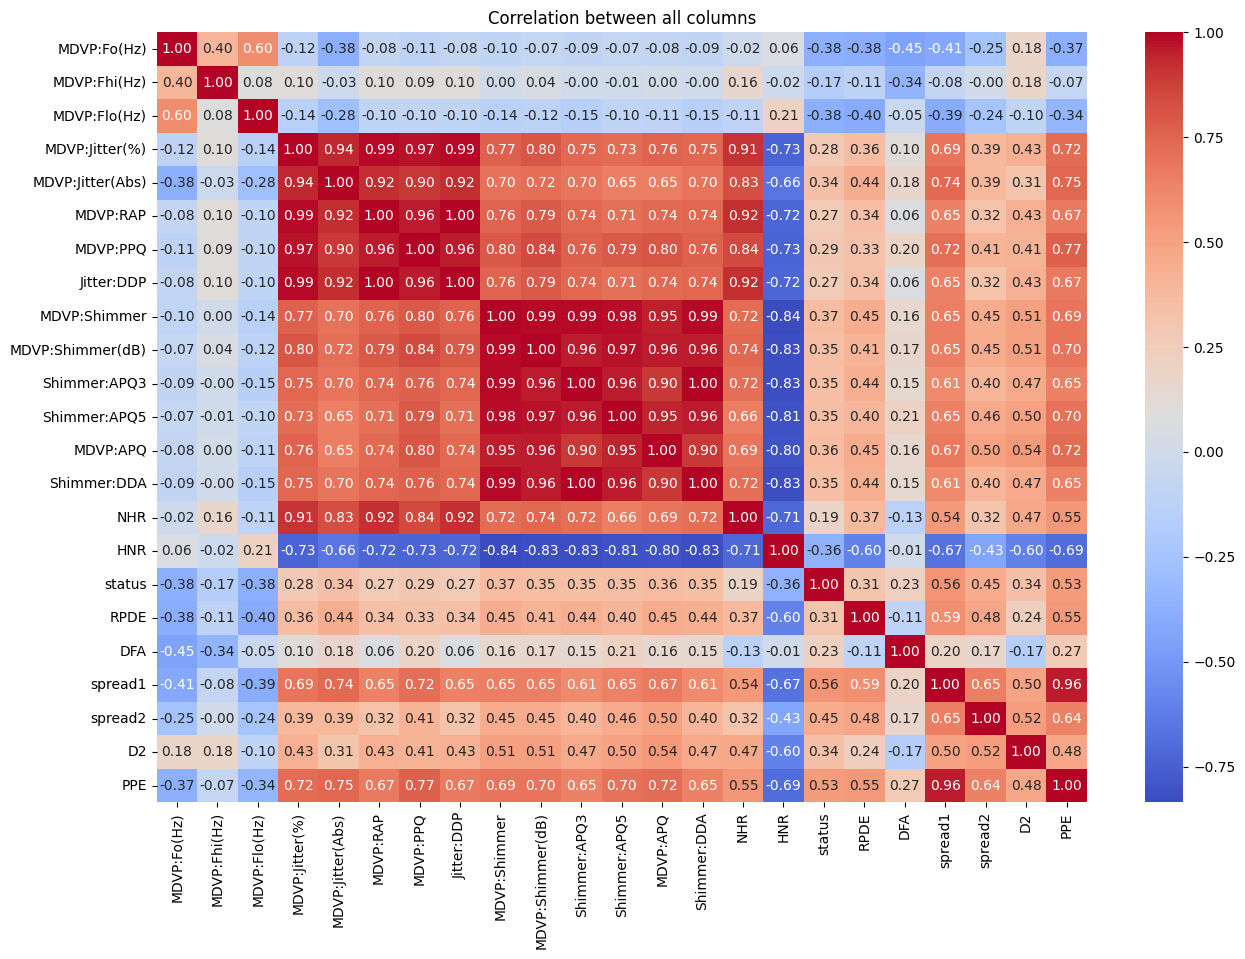

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between all columns')
plt.show()


In [11]:
# dropping HNR ?? due to negative corr with status
df.drop(["HNR"], axis=1, inplace = True)

In [12]:
from sklearn.model_selection import train_test_split


X = df.drop(columns=['status'])
y = df['status']

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the train and test sets to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (156, 21)
X_test shape: (39, 21)
y_train shape: (156,)
y_test shape: (39,)


# Training and Testing

## using Naive Bayes
- Accuracy: 0.717948717948718
- F1 Score: 0.6927880326631441

In [19]:
import matplotlib.pyplot as plt

In [31]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(X_train, y_train)

GaussianNB()

In [32]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)

y_pred = model.predict(X_test)

accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.7435897435897436
F1 Score: 0.7236467236467237


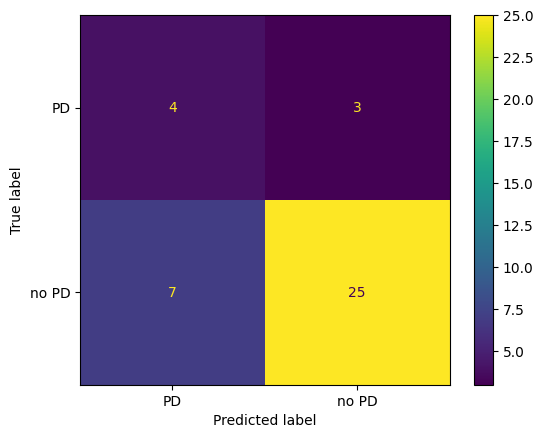

In [33]:
labels = ["PD", "no PD"]
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

In [34]:
from sklearn.metrics import classification_report

# Assuming 'model' is your trained classification model
# Make predictions on the test set
# y_pred = model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.36      0.57      0.44         7
           1       0.89      0.78      0.83        32

    accuracy                           0.74        39
   macro avg       0.63      0.68      0.64        39
weighted avg       0.80      0.74      0.76        39



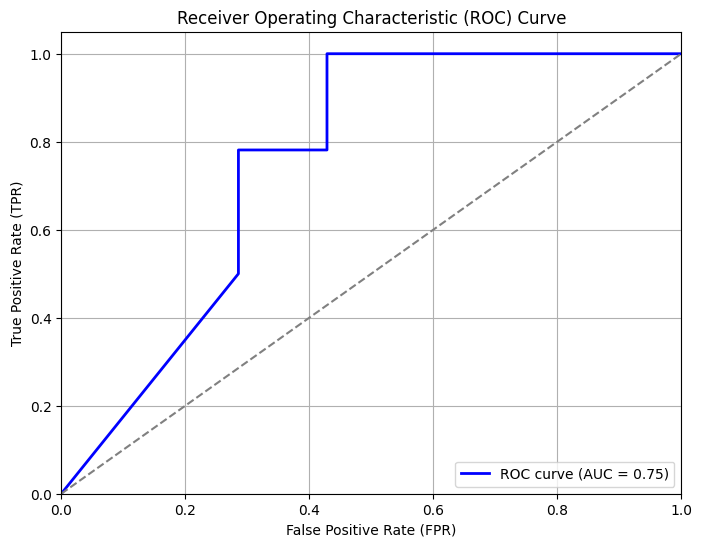

In [37]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Create a Gaussian Naive Bayes classifier
clf = GaussianNB()

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the probabilities for test dataset
y_prob = clf.predict_proba(X_test)[:, 1]

# Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the area under the ROC curve (AUC)
auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


## using SVM
- Accuracy: 0.8974358974358975
- f1 score:  0.9149321266968325

In [28]:
#Import svm model
# rbf gives better scores then linear
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='rbf') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [29]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("f1 score: ",f1_score(y_pred, y_test, average="weighted"))

# Print classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.8974358974358975
f1 score:  0.9149321266968325
              precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.89      1.00      0.94        32

    accuracy                           0.90        39
   macro avg       0.94      0.71      0.77        39
weighted avg       0.91      0.90      0.88        39



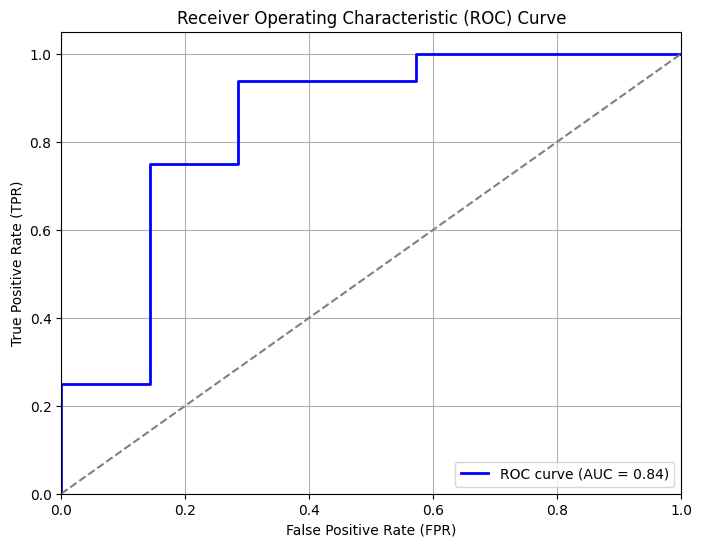

In [30]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate probabilities of the positive class (class 1)
y_prob = clf.decision_function(X_test)

# Calculate the false positive rate (FPR), true positive rate (TPR), and threshold values
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the area under the ROC curve (AUC)
auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


## KNN


- Accuracy: 0.9487179487179487
- f1 score:  0.9522144522144521

In [86]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [88]:
y_pred = knn.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))
print("f1 score: ",f1_score(y_pred, y_test, average="weighted"))
print(classification_report(y_test, y_pred))

Accuracy: 0.9487179487179487
f1 score:  0.9522144522144521
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



In [80]:
# trying to find best value for n_neighbors
f1_vals = []
accu = []
for n_neigh in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=n_neigh)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    f1_s = f1_score(y_pred, y_test, average="weighted")
    ac_s = accuracy_score(y_test, y_pred)
    f1_vals.append(f1_s)
    accu.append(ac_s)



In [81]:
print(f1_vals)

[0.9211233211233212, 0.9181811438320597, 0.9211233211233212, 0.8926799007444168, 0.9522144522144521, 0.8974358974358975, 0.9254437869822485, 0.9254437869822485, 0.9044289044289044, 0.9254437869822485, 0.9318442751278573, 0.9318442751278573, 0.9318442751278573, 0.9318442751278573, 0.9318442751278573, 0.9044289044289044, 0.9027622940666419, 0.9027622940666419, 0.9027622940666419]


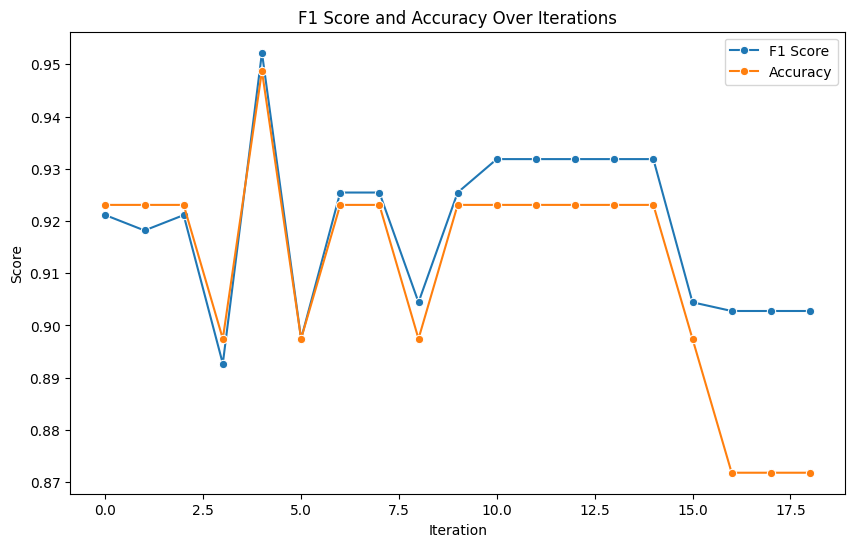

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming f1_vals and accu are your arrays containing F1 scores and accuracies respectively

# Generate x-axis values (assuming both arrays have the same length)
x_values = range(len(f1_vals))

# Plot F1 scores
plt.figure(figsize=(10, 6))
sns.lineplot(x=x_values, y=f1_vals, label='F1 Score', marker='o')
sns.lineplot(x=x_values, y=accu, label='Accuracy', marker='o')

# Set plot labels and title
plt.xlabel('Iteration')
plt.ylabel('Score')
plt.title('F1 Score and Accuracy Over Iterations')

# Show legend
plt.legend()

# Show plot
plt.show()


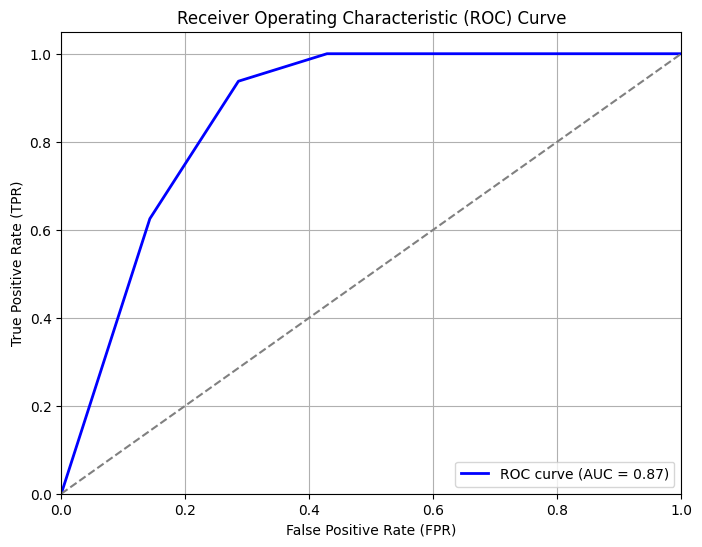

In [38]:
# ROC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Create a KNN classifier
clf = KNeighborsClassifier(n_neighbors=5)

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the probabilities for the positive class
y_prob = clf.predict_proba(X_test)[:, 1]

# Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the area under the ROC curve (AUC)
auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


## MLP
- Accuracy: 0.9487179487179487
- f1 score:  0.9522144522144521

In [17]:
#Importing MLPClassifier
from sklearn.neural_network import MLPClassifier

#Initializing the MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=100,activation = 'relu',solver='adam',random_state=1)

In [96]:
classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=100, random_state=1)

In [97]:
y_pred = classifier.predict(X_test)

In [98]:
confusion_matrix(y_pred, y_test)

array([[ 5,  0],
       [ 2, 32]])

In [99]:
print("Accuracy:",accuracy_score(y_test, y_pred))
print("f1 score: ",f1_score(y_pred, y_test, average="weighted"))
print(classification_report(y_test, y_pred))

Accuracy: 0.9487179487179487
f1 score:  0.9522144522144521
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686

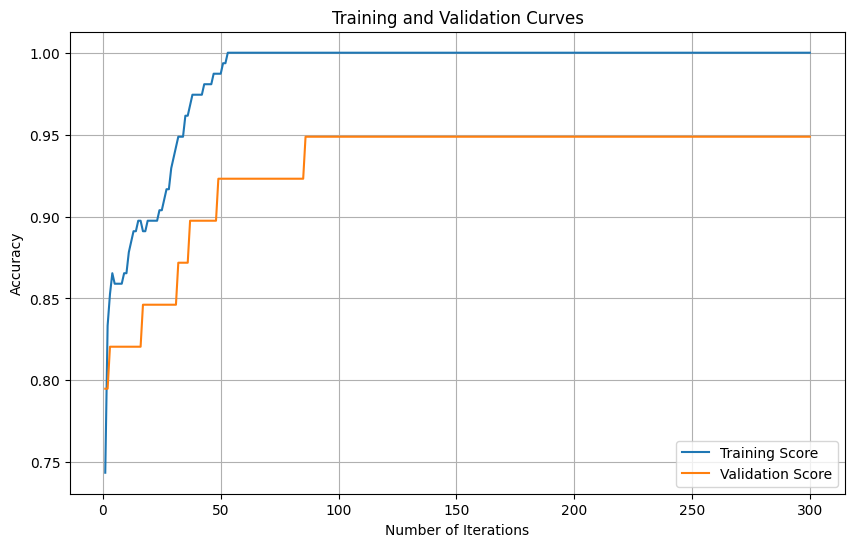

In [20]:

from sklearn.neural_network import MLPClassifier


# Split the data into training and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define your MLPClassifier with your desired parameters
classifier = MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=300, activation='relu', solver='adam', random_state=1)

# Lists to store training and validation scores
train_scores = []
val_scores = []

# Train the model for different number of iterations
for iter in range(1, 301):
    classifier.max_iter = iter
    classifier.fit(X_train, y_train)
    # .score is vanilla accuracy
    train_score = classifier.score(X_train, y_train)
    val_score = classifier.score(X_test, y_test)
    train_scores.append(train_score)
    val_scores.append(val_score)

# Plot the Training and Validation Curves
plt.figure(figsize=(10, 6))
plt.plot(range(1, 301), train_scores, label='Training Score')
plt.plot(range(1, 301), val_scores, label='Validation Score')
plt.title('Training and Validation Curves')
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


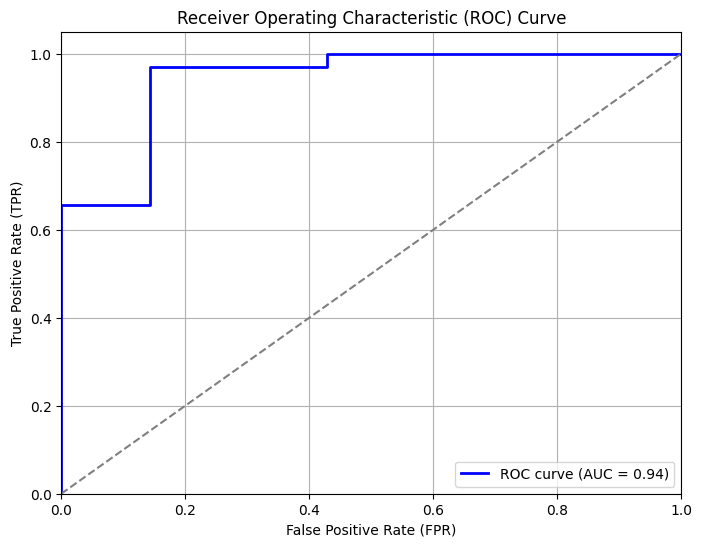

In [39]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Create an MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the probabilities for the positive class
y_prob = clf.predict_proba(X_test)[:, 1]

# Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the area under the ROC curve (AUC)
auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


## using LR
- Accuracy: 0.8974358974358975
- F1-score: 0.9393939393939394

it is not reccommended to use Linear Regression for classification tasks

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import numpy as np

# Assuming you have your data loaded into X_train, X_test, y_train, and y_test
# Assuming y_train and y_test are binary labels (0 or 1)

# Train the linear regression model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regression_model.predict(X_test)

# Apply thresholding to convert predictions to binary labels
threshold = 0.5
y_pred_binary = np.where(y_pred >= threshold, 1, 0)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)
f1 = f1_score(y_test, y_pred_binary)

# Print F1-score
print("F1-score:", f1)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_binary))

Accuracy: 0.8974358974358975
F1-score: 0.9393939393939394
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.57      0.67         7
           1       0.91      0.97      0.94        32

    accuracy                           0.90        39
   macro avg       0.86      0.77      0.80        39
weighted avg       0.89      0.90      0.89        39



## PLA
- Accuracy: 0.8461538461538461
- F1-score: 0.9032258064516129

Accuracy: 0.8461538461538461
F1-score: 0.9032258064516129
AUC: 0.9151785714285714


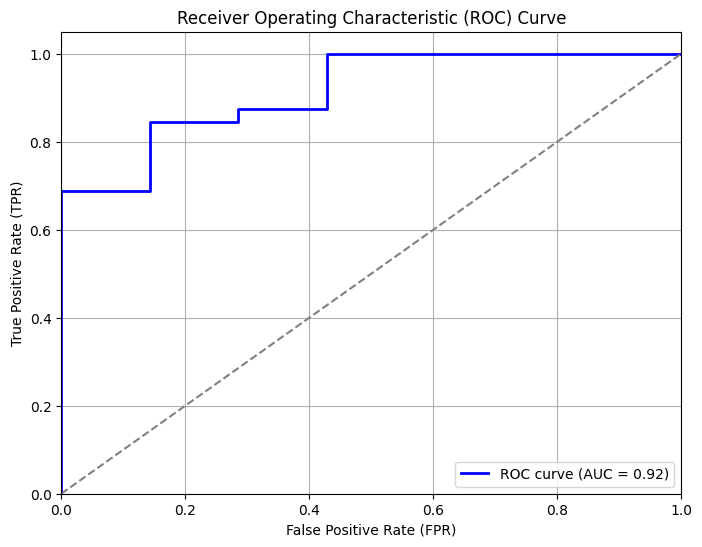

In [45]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Create a Perceptron classifier
clf = Perceptron(max_iter=100, tol=1e-3, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

# Calculate probabilities for the positive class (class 1)
y_prob = clf.decision_function(X_test)

# Calculate false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate area under the ROC curve (AUC)
auc = roc_auc_score(y_test, y_prob)
print("AUC:", auc)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


## Clustering
- accuracy, f1 score, roc curve not applicable for clustering

In [49]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Assuming you have your data loaded into X

# Create a KMeans object
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit the KMeans model to the data
kmeans.fit(X)

# Obtain cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Calculate silhouette score
silhouette_avg = silhouette_score(X, labels)
print("Silhouette Score:", silhouette_avg)

# Calculate within-cluster sum of squares (WCSS)
wcss = sum(np.min(np.square(kmeans.transform(X)), axis=1))
print("Within-Cluster Sum of Squares (WCSS):", wcss)


Silhouette Score: 0.392657962049117
Within-Cluster Sum of Squares (WCSS): 2711.382619765017


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## INFERENCE: The MLP model provides us with best in class accuracy , f1 scores